$${\color{yellow}{\text{Deep Learning Webinar-5, Saturday, July 5, 2025}}}$$



---

Load essential libraries

---

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
torch.set_printoptions(precision = 3, sci_mode = False)

---

Mount Google Drive folder if running Google Colab

---

In [7]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/Office of Online Education/MDS6304_Webinar_April2025'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

---

Automatic differentiation in PyTorch.

Example: calculate the sensitivity of $L(w) = 4w+w^3$ w.r.t. the input $w$ at $w=1.$

Sensitivity $\nabla_wL = 4+3w^2,$ which at $w=1$ is equal to $4+3\times1^2=7.$

---

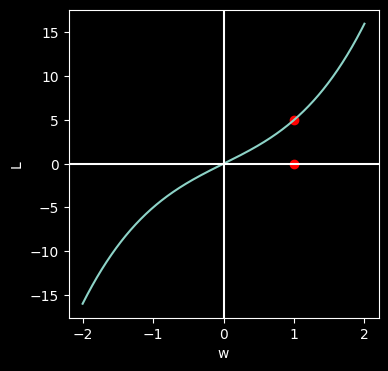

The gradient of L w.r.t. w at w = 1 is 7.000000


In [8]:
# 1. Create linspace and define function L(w)
w_vals = torch.linspace(-2, 2, 1000)
L_fn = lambda w: 4 * w + w ** 3

# 2. Plot L(w)
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(w_vals, L_fn(w_vals))
ax.set_xlabel('w')
ax.set_ylabel('L')
ax.axhline(y = 0, color = 'white')
ax.axvline(x = 0, color = 'white')

# Mark L(1)
ax.scatter(1, L_fn(torch.tensor(1.0)), c = 'red')
ax.scatter(1, 0, c='red')
plt.show()

# 3. Compute gradient of L at w = 1
w = torch.tensor(1.0, requires_grad = True)
L = 4 * w + w ** 3
L.backward()  # Compute gradient
print('The gradient of L w.r.t. w at w = 1 is %f' % w.grad.item())

---

Another example with a negative gradient.

Calculate the sensitivity of $L(w) = 4w-w^3$ w.r.t. the input $w$ at $w=1.5.$

Sensitivity $\nabla_wL = 4-3w^2,$ which at $w=1.5$ is equal to $4-3\times1.5^2=-2.75.$

---

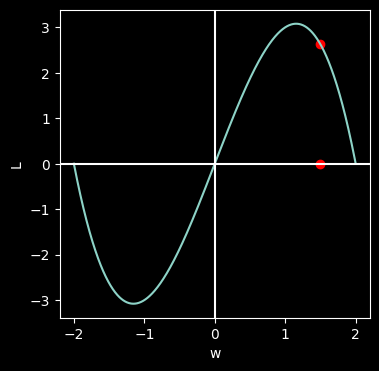

The gradient of L w.r.t. w at w = 1.5 is -2.750000


In [15]:
# 1. Define linspace and function L(w) = 4w - w^3
w_vals = torch.linspace(-2, 2, 1000)
L_fn = lambda w: 4 * w - w ** 3

# 2. Plot the function
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(w_vals, L_fn(w_vals))
ax.set_xlabel('w')
ax.set_ylabel('L')
ax.axhline(y = 0, color = 'white')
ax.axvline(x = 0, color = 'white')

# Highlight point at w = 1.5
w_point = torch.tensor(1.5)
ax.scatter(w_point, L_fn(w_point), c = 'red')
ax.scatter(w_point, 0, c = 'red')
plt.show()

# 3. Compute gradient at w = 1.5
w = torch.tensor(1.5, requires_grad = True)
L = 4 * w - w ** 3
L.backward()

print('The gradient of L w.r.t. w at w = 1.5 is %f' % w.grad.item())

---

Function with multiple inputs.

Example: calculate the sensitivity of $L(w_1,w_2) = w_1+w_2^2$ w.r.t. the inputs $w_1, w_2$ at $w_1=1, w_2=2.$

Setting $\mathbf{w} = \begin{bmatrix}w_1\\w_2\end{bmatrix},$ sensitivity $\nabla_\mathbf{w}L= \begin{bmatrix}\nabla_{w_1}(w_1+w_2^2)\\\nabla_{w_2}(w_1+w_2^2)\end{bmatrix} = \begin{bmatrix}1\\2w_2\end{bmatrix},$

 which at $w_1=1,w_2=2$ is equal to $\begin{bmatrix}1\\4\end{bmatrix}.$

 ---

In [10]:
# Define variables with gradient tracking
w1 = torch.tensor(1.0, requires_grad=True)
w2 = torch.tensor(2.0, requires_grad=True)

# Compute the function
L = w1 + w2 ** 2

# Compute gradients
L.backward()

# Print gradients
print([w1.grad.item(), w2.grad.item()])

[1.0, 4.0]


---

In the previous example, we could also calculate the sensitivity w.r.t. all the variables in the vector in one shot.

---

In [11]:
# Define variables as a vector with gradient tracking
w = torch.tensor([1.0, 2.0], requires_grad = True)

# Compute the function
L = w[0] + w[1] ** 2

# Compute gradients
L.backward()

# Print gradients
print(w.grad)

tensor([1., 4.])


---

Another example of using a tensor variable as input where we calculate the sensitivity w.r.t. all the variables in the tensor:.

Consider calculating the sensitivity of $L(\mathbf{w}) = \lVert \mathbf{w}\rVert^2$ for an $8$-vector $w$ at $\tiny w=\begin{bmatrix}0.1\\0\\0.1\\0\\0.1\\0\\0.1\\0\end{bmatrix}.$

We know that $\nabla_\mathbf{w}\left(\lVert\mathbf{w}\rVert^2\right)=2\mathbf{w}$ which evaluated at $\tiny w=\begin{bmatrix}0.1\\0\\0.1\\0\\0.1\\0\\0.1\\0\end{bmatrix}$ is $\tiny2\begin{bmatrix}0.1\\0\\0.1\\0\\0.1\\0\\0.1\\0\end{bmatrix}=\begin{bmatrix}0.2\\0\\0.2\\0\\0.2\\0\\0.2\\0\end{bmatrix}.$

---

In [12]:
# Define variables as a vector with gradient tracking
w = torch.tensor([0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0], requires_grad = True)

# Compute the function
L = torch.norm(w)**2

# Compute gradients
L.backward()

# Print gradients
print(w.grad)

tensor([0.200, 0.000, 0.200, 0.000, 0.200, 0.000, 0.200, 0.000])


---

Gradient calculation in PyTorch when a

- variable is part of the computation graph
- variable is marked non-trainable
- variable is not used at all
- variable is wrapped in tensor arithmetic (becoming a constant)

---

In [13]:
# Independent variable
w1 = torch.tensor(1.0, requires_grad = True)

# Constant tensor (non-trainable)
c1 = torch.tensor(-2.0)

# Variable treated as constant (no gradient tracking)
w2 = torch.tensor(2.0, requires_grad = False)

# Variable + constant → becomes a tensor, no gradient tracking
c2 = torch.tensor(10.0, requires_grad = True) + 1.0  # treated as constant now

# Unused variable
w3 = torch.tensor(0.0, requires_grad = True)

# Forward computation
L = (w1 + c1)**2 + w2**3 + 4 * c2

# Backward
L.backward()

# Gradients
print(w1.grad)   # Used in computation
print(w2.grad)   # Not tracked (requires_grad = False)
print(w3.grad)   # Unused in L
print(c1.grad)   # c1 is a constant (no grad tracking in PyTorch)
print(c2.grad)   # c2 is a tensor (not a leaf with grad_fn)

tensor(-2.)
None
None
None
None


C:\Users\leston\AppData\Local\Temp\ipykernel_14384\3003068589.py:27: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(c2.grad)   # c2 is a tensor (not a leaf with grad_fn)


---

Example: consider calculating the gradient of $\mathbf{a}(z) = \begin{bmatrix}a_1(z)\\a_2(z)\end{bmatrix}  = \begin{bmatrix}2z\\z^4\end{bmatrix}$ at $z = -1.$

The gradient is $\nabla_z(\mathbf{a})= \begin{bmatrix}\nabla_z(a_1) & \nabla_z(a_2)\end{bmatrix}=\begin{bmatrix}\nabla_z(2z) & \nabla_z\left(z^4\right)\end{bmatrix}=\begin{bmatrix}2&4z^3\end{bmatrix}.$

Note that the sum of the gradients $\nabla_z(a_1)+\nabla_z(a_2)=2+4z^3$ for $z=-1$ is returned which is equal to $2+4(-1)^3=-2.$

---

In [14]:
z = torch.tensor([-1.0], requires_grad = True)

# Forward computation
a = torch.tensor([2*z, z**4], requires_grad = True)

# Backward
a.sum().backward()

# Gradients
print(a.grad)

tensor([1., 1.])


C:\Users\leston\AppData\Local\Temp\ipykernel_14384\1493846140.py:4: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  a = torch.tensor([2*z, z**4], requires_grad = True)


applying the gradient descent method
. a maximm numbers of iteration seqaul to 1000
. a stopping tolerace equal to 10^-6
. a learning rate of 0.001
to minimize L(w)=(w1-2)^2+(w2-2)^2

In [8]:
w=torch.tensor([0.0,0.0],requires_grad=True)
maxiter=1000
tol=1e-06
lr=0.01
nor_grad=float('inf')
k=0
while k<maxiter and nor_grad >tol:
    if w.grad is not None:
        w.grad.zero_()
    L=(w[0]-2)**2+(w[1]+3)**2
    L.backward()
    with torch.no_grad():
        w-=lr*w.grad 
    norm_grad=w.grad.norm().item()
    k+=1
    print(f'iterations{k}:||grad||={norm_grad}')

iterations1:||grad||=7.211102485656738
iterations2:||grad||=7.066880702972412
iterations3:||grad||=6.925542831420898
iterations4:||grad||=6.787032127380371
iterations5:||grad||=6.6512908935546875
iterations6:||grad||=6.518265724182129
iterations7:||grad||=6.387900352478027
iterations8:||grad||=6.2601423263549805
iterations9:||grad||=6.134939193725586
iterations10:||grad||=6.012240409851074
iterations11:||grad||=5.891995906829834
iterations12:||grad||=5.774155616760254
iterations13:||grad||=5.65867280960083
iterations14:||grad||=5.545499324798584
iterations15:||grad||=5.434589385986328
iterations16:||grad||=5.325897693634033
iterations17:||grad||=5.219379901885986
iterations18:||grad||=5.114992141723633
iterations19:||grad||=5.012691974639893
iterations20:||grad||=4.91243839263916
iterations21:||grad||=4.814189434051514
iterations22:||grad||=4.717905521392822
iterations23:||grad||=4.623547554016113
iterations24:||grad||=4.531076431274414
iterations25:||grad||=4.440454959869385
iteration